In [1]:
import pandas as pd

In [3]:
import os
import glob

def get_all_csv_files(directory):
    # Join the directory path and the pattern for .csv files
    csv_files = glob.glob(os.path.join(directory, "*.csv"))
    
    return csv_files





In [12]:

# Example usage:
directory_path = '../data/'
csv_files = get_all_csv_files(directory_path)
count = 0
total = len(csv_files)
marker = 10
for file in csv_files:
    count += 1
    percent = 100*count/total
    if percent >= marker:
        print('percent done: %', percent)
        marker+=10
    data = pd.read_csv(file)
    data.dropna(inplace=True)
    data = data.reset_index()
    if not data.empty:
        index = data['DATE (YYYY-MM-DDTHH:MI:SSZ)'].unique()
        float_number = data['PLATFORM_CODE'].iloc[0]
        
        agg_data = {
            'float_number': []
            ,'date':[]
            ,'latitude':[]
            ,'longitude':[]
            ,'q0_psal':[]
            ,'q1_psal':[]
            ,'q2_psal':[]
            ,'q3_psal':[]
            ,'q4_psal':[]
            ,'q0_temp':[]
            ,'q1_temp':[]
            ,'q2_temp':[]
            ,'q3_temp':[]
            ,'q4_temp':[]
        }

        if 'PSAL (psu)' in data.columns and 'TEMP (degree_Celsius)' in data.columns:
            for i in index:
                subset = data[data['DATE (YYYY-MM-DDTHH:MI:SSZ)']==i]
                agg_data['float_number'].append(float_number)
                agg_data['date'].append(i)
                agg_data['latitude'].append(subset['LATITUDE (degree_north)'].iloc[0])
                agg_data['longitude'].append(subset['LONGITUDE (degree_east)'].iloc[0])
                q0 = min(subset['PRES (decibar)'])
                q1 = min(subset['PRES (decibar)'], key=lambda x:abs(x-500))
                q2 = min(subset['PRES (decibar)'], key=lambda x:abs(x-1000))
                q3 = min(subset['PRES (decibar)'], key=lambda x:abs(x-1500))
                q4 = max(subset['PRES (decibar)'])
                agg_data['q0_psal'].append(subset[subset['PRES (decibar)']==q0]['PSAL (psu)'].iloc[0])
                agg_data['q1_psal'].append(subset[subset['PRES (decibar)']==q1]['PSAL (psu)'].iloc[0])
                agg_data['q2_psal'].append(subset[subset['PRES (decibar)']==q2]['PSAL (psu)'].iloc[0])
                agg_data['q3_psal'].append(subset[subset['PRES (decibar)']==q3]['PSAL (psu)'].iloc[0])
                agg_data['q4_psal'].append(subset[subset['PRES (decibar)']==q4]['PSAL (psu)'].iloc[0])
                agg_data['q0_temp'].append(subset[subset['PRES (decibar)']==q0]['TEMP (degree_Celsius)'].iloc[0])
                agg_data['q1_temp'].append(subset[subset['PRES (decibar)']==q1]['TEMP (degree_Celsius)'].iloc[0])
                agg_data['q2_temp'].append(subset[subset['PRES (decibar)']==q2]['TEMP (degree_Celsius)'].iloc[0])
                agg_data['q3_temp'].append(subset[subset['PRES (decibar)']==q3]['TEMP (degree_Celsius)'].iloc[0])
                agg_data['q4_temp'].append(subset[subset['PRES (decibar)']==q4]['TEMP (degree_Celsius)'].iloc[0])
            agg_data = pd.DataFrame(agg_data)
            agg_data['date'] = pd.to_datetime(agg_data['date'])
            agg_data['date'] = agg_data['date'].dt.strftime('%Y-%m-%d') 
            
            all_data = pd.concat([agg_data, all_data])
            all_data.to_csv('all_ocean_data.csv', index=False)




percent done: % 10.007639419404125
percent done: % 20.00679059502589


C:\Users\Jon\AppData\Local\Temp\ipykernel_25524\966517287.py:60: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  agg_data['date'] = pd.to_datetime(agg_data['date'])
C:\Users\Jon\AppData\Local\Temp\ipykernel_25524\966517287.py:60: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  agg_data['date'] = pd.to_datetime(agg_data['date'])
C:\Users\Jon\AppData\Local\Temp\ipykernel_25524\966517287.py:60: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  agg_data['date'] = pd.to_datetime(agg_data['date'])


percent done: % 30.005941770647652


C:\Users\Jon\AppData\Local\Temp\ipykernel_25524\966517287.py:60: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  agg_data['date'] = pd.to_datetime(agg_data['date'])
C:\Users\Jon\AppData\Local\Temp\ipykernel_25524\966517287.py:60: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  agg_data['date'] = pd.to_datetime(agg_data['date'])


percent done: % 40.005092946269414
percent done: % 50.00424412189118
percent done: % 60.003395297512945
percent done: % 70.00254647313471


C:\Users\Jon\AppData\Local\Temp\ipykernel_25524\966517287.py:60: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  agg_data['date'] = pd.to_datetime(agg_data['date'])


percent done: % 80.00169764875648


C:\Users\Jon\AppData\Local\Temp\ipykernel_25524\966517287.py:60: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  agg_data['date'] = pd.to_datetime(agg_data['date'])


percent done: % 90.00084882437824
percent done: % 100.0


In [2]:
import pandas as pd
all_data = pd.read_csv('all_ocean_data.csv')

In [3]:
pd.set_option('display.min_rows', 70)
pd.set_option('display.max_columns', None)

In [4]:
sorted_data = all_data.sort_values(['date','float_number'], ascending=[True, True])

In [5]:
undup = sorted_data.drop_duplicates()
undup.shape

(681519, 14)

In [32]:
for date in undup['date'].unique():

    print(undup[undup['date']==date][['date', 'latitude','longitude']])

              date  latitude  longitude
328538  1999-10-21    -12.29    106.734
              date  latitude  longitude
328468  1999-10-22   -12.167    111.887
              date  latitude  longitude
328379  1999-10-24   -13.216    115.992
              date  latitude  longitude
328674  1999-10-25   -13.029     119.97
              date  latitude  longitude
328539  1999-10-31   -12.581    106.347
              date  latitude  longitude
328469  1999-11-01   -11.916    111.764
              date  latitude  longitude
328380  1999-11-03   -12.646    116.215
              date  latitude  longitude
328540  1999-11-10   -12.856    105.823
              date  latitude  longitude
328470  1999-11-11   -11.926    111.634
              date  latitude  longitude
328381  1999-11-13   -12.419    116.628
              date  latitude  longitude
328675  1999-11-14   -13.223     119.74
              date  latitude  longitude
328541  1999-11-20   -12.848     105.59
              date  latitude  longitude


KeyboardInterrupt: 

In [18]:
%pip install basemap


  Using cached packaging-23.2-py3-none-any.whl.metadata (3.2 kB)
   ---------------------------------------- 0.0/507.3 kB ? eta -:--:--
   --- ----------------------------------- 41.0/507.3 kB 991.0 kB/s eta 0:00:01
   ---------------- ----------------------- 204.8/507.3 kB 2.5 MB/s eta 0:00:01
   ---------------------------------------- 507.3/507.3 kB 4.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/30.5 MB ? eta -:--:--
    --------------------------------------- 0.6/30.5 MB 20.5 MB/s eta 0:00:02
   --- ------------------------------------ 2.4/30.5 MB 30.1 MB/s eta 0:00:01
   ------ --------------------------------- 5.0/30.5 MB 40.1 MB/s eta 0:00:01
   -------- ------------------------------- 6.8/30.5 MB 43.7 MB/s eta 0:00:01
   -------- ------------------------------- 6.8/30.5 MB 43.7 MB/s eta 0:00:01
   -------- ------------------------------- 6.8/30.5 MB 25.8 MB/s eta 0:00:01
   -------------------- ------------------- 15.8/30.5 MB 59.5 MB/s eta 0:00:01
   ---

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spacy-transformers 1.3.4 requires transformers<4.37.0,>=3.4.0, but you have transformers 4.39.0 which is incompatible.

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
import datetime as dt
undup['date'] = pd.to_datetime(undup['date'])
undup = undup[undup['date'].dt.year==2006]

C:\Users\Jon\AppData\Local\Temp\ipykernel_39148\3366570401.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  undup['date'] = pd.to_datetime(undup['date'])


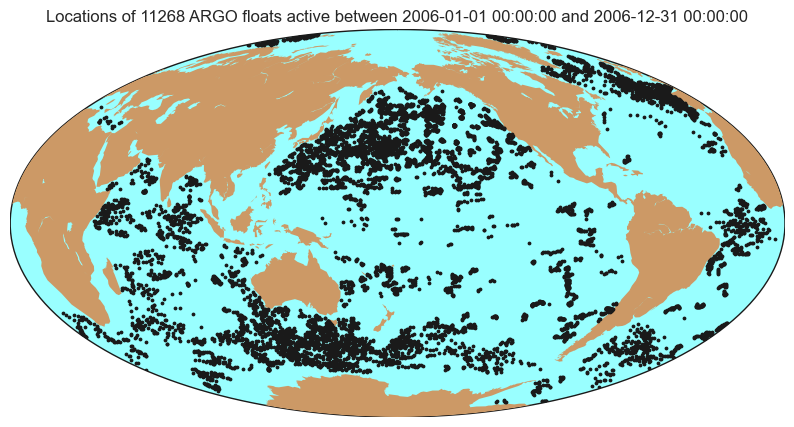

In [24]:
from netCDF4 import Dataset, num2date
import time, calendar, datetime, numpy
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import os
try:
    from urllib.request import urlretrieve
except ImportError:
    from urllib import urlretrieve
# data downloaded from the form at
# http://coastwatch.pfeg.noaa.gov/erddap/tabledap/apdrcArgoAll.html

lats = undup['latitude']
lons = undup['longitude']
time = undup['date']  # seconds since epoch
times = time
t1 = times.min(); t2 = times.max()
date1 = t1
date2 = t2

# draw map with markers for float locations
m = Basemap(projection='hammer',lon_0=180)
x, y = m(lons,lats)
m.drawmapboundary(fill_color='#99ffff')
m.fillcontinents(color='#cc9966',lake_color='#99ffff')
m.scatter(x,y,3,marker='o',color='k')
plt.title('Locations of %s ARGO floats active between %s and %s' %\
        (len(lats),date1,date2),fontsize=12)
plt.show()